In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Пример дерева решений

![Tree for tree classification](Trees.png)

В машинном обучение дерево строят по выборке.

Построение _оптимального_ дерева – NP-трудная задача [Hyafil L., Rivest R.L., 1976]

Обычно применяют жадный рекурсивный алгоритм. Очередное _разбиение_ (split) строят так, чтобы по возможности максимально уменьшить _неоднородность_ (impurity)

## Популярные алгоритмы построения дерева
 
  * See5/C5.0 [Quinlan et., 1997]  ← C4.5 [Quinlan, 1993]  ← ID3 [Quinlan, 1979]  ← CLS [Hunt & Marin & Stone & 1966] 
  * Classification and Regression Trees [Breiman & Friedman & Olshen & Stone, 1984]  ← CHAID [Kass, 1980]  ← THAID [Morgan & Messenger 1973]  ← AID [Morgan & Sonquist, 1963]

– это жадные рекурсивные алгоритмы, на каждом шаге разбивающие очередной ящик, чтобы добиться максимального уменьшения 
взвешенной _неоднородности_:

![Decision tree construction algorithm](CART.png)


## Алгоритм CART

Разбиения (splits) имеют вид:

   * $x_j \le c$ для количественных признаков;
   * $x_j \in L$, где $L \subset \{1,2,\dots,M_j\}$ для качественных признаков.

Дерево строим рекурсивно.

Пусть на текущем шаге имеется разбиение пространства признаков на области $R_1, R_2, \dots, R_M$.

 * Выбираем область $R_m$.
 * Выбираем $j$ и $c$ (или $L$) так, чтобы добиться максимального уменьшения _неоднородности_, или _загрязненности_, (impurity) $Q_m$ ($m=1,2,\dots,M$) (т. е. максимального увеличения «_прироста информации_»).
 * Строим разбиение (split) и повторяем действия.

Способы измерить «неоднородность»:

Для задачи восстановления регрессии:
         $$
             Q_m=\sum_{x^{(i)}\in R_m}\left(y^{(i)} - f(x^{(i)})\right)^2.
        $$

Для задачи классификации:

 * Ошибка классификации:

     $$
         Q_m = \frac{1}{N_m} \sum_{x^{(i)} \in R_m} I\left(y^{(i)} \ne k(m)\right) = 1 - \max_k p_{km} = 1 - p_{k(m), m},
      $$
  $p_{km}$ – доля объектов $k$-го класса в $R_m$,
  $k(m)$ – класс, преобладающий в $R_m$.
 * Индекс К.Джини (вероятность, что два наугад взятых элемента из $R_m$ принадлежат разным классам):
      $$
  Q_m = \sum_{k\ne k'} p_{mk} p_{mk'} = \sum_{k=1}^K p_{mk} (1 - p_{mk}) = 1 - \sum_{k=1}^K p_{mk}^2.
      $$ 

 * Энтропия:
      $$
          Q_m = -\sum_{k=1}^K p_{mk} \log p_{mk}.
      $$ 

Если $K = 2$, то эти функции равны соответственно
$$
1 - \max\{p, 1 - p\}, \quad
2p(1-p), \quad
-p\log p - (1 - p)\log(1 - p),
$$
где $p=p_{1m}$ – доля объектов $1$-го класса, попавших в ящик $R_m$. 



![Impurity measure](Impurity.png)

## Ирисы Фишера

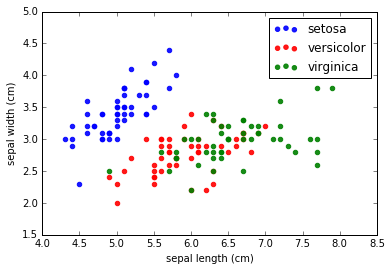

In [24]:
from sklearn import datasets
iris = datasets.load_iris()

X = iris.data
y = iris.target
y_names = iris.target_names
feature_names = iris.feature_names

j1 = 0
j2 = 1

plt.scatter(X[y == 0, j1], X[y == 0, j2], color = 'b', label = y_names[0], alpha = 0.9)
plt.scatter(X[y == 1, j1], X[y == 1, j2], color = 'r', label = y_names[1], alpha = 0.9)
plt.scatter(X[y == 2, j1], X[y == 2, j2], color = 'g', label = y_names[2], alpha = 0.9)
plt.xlabel(feature_names[j1])
plt.ylabel(feature_names[j2])

plt.legend(loc = 'best')

In [22]:
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
X = X[:, [j1, j2]]

from sklearn import tree
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [8]:
tree_model.predict([[7.5, 3.0]])

array([2])

## Рисуем дерево

In [9]:
tree.export_graphviz(tree_model, out_file = 'iris_tree.dot', feature_names = [feature_names[j1], feature_names[j2]])   
!dot -Tpng iris_tree.dot -o iris_tree.png

![Iris tree](iris_tree.png)

## Сгенерированные данные

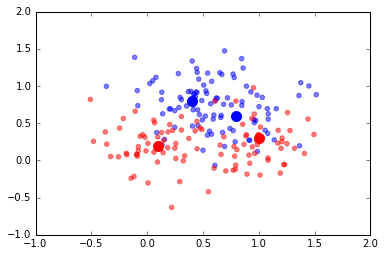

In [10]:
import mysk

X, y = mysk.generate_points(seed = 0)
mysk.draw_points(X, y)
mysk.draw_centers()

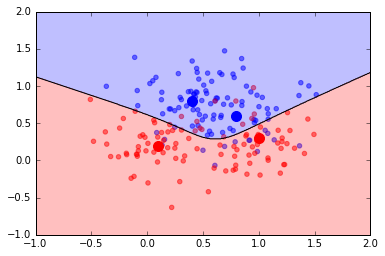

In [11]:
mysk.draw_points(X, y)
mysk.draw_centers()
mysk.draw_bayes_sep_curve()

In [12]:
X_test, y_test = mysk.generate_points(seed = 1)

In [13]:
tree_model = tree.DecisionTreeClassifier()
tree_model.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

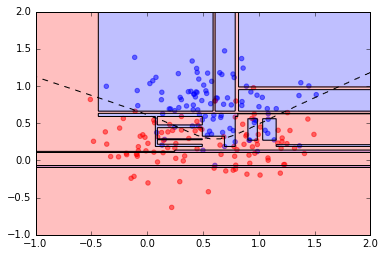

In [14]:
mysk.draw_points(X, y)
mysk.draw_sep_curve(tree_model)
mysk.draw_bayes()

In [15]:
err_train = np.mean(y != tree_model.predict(X))
err_test = np.mean(y_test != tree_model.predict(X_test))
print(err_train, err_test)

0.0 0.27
